# Derivatives exercices

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import fft

### Exercice 1

([<matplotlib.lines.Line2D at 0x7f60b1c10b80>],
 Text(0.5, 0, 'temps (s)'),
 Text(0, 0.5, 'amplitude'))

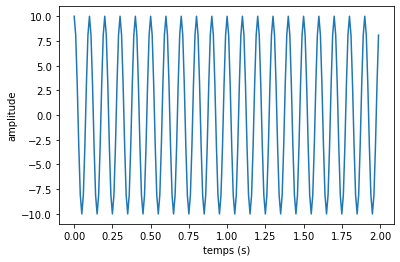

In [2]:
A=10 #amplitude
v=10 #Hz
w=2*math.pi*v #omega

T=2 #period
dt=1e-2 #sec -> temporal pace
t=np.arange(0,2,dt) #time

f=A*np.cos(w*t)

plt.figure(1)
plt.plot(t,f), plt.xlabel('temps (s)'), plt.ylabel('amplitude')

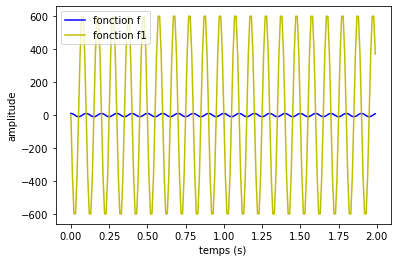

In [3]:
f1=-w*A*np.sin(w*t)

plt.figure(1)
plt.plot(t,f,label='fonction f',color='b'), plt.xlabel('temps (s)'), plt.ylabel('amplitude')
plt.plot(t,f1,label='fonction f1',color='y'), plt.xlabel('temps (s)'), plt.ylabel('amplitude')
plt.legend()

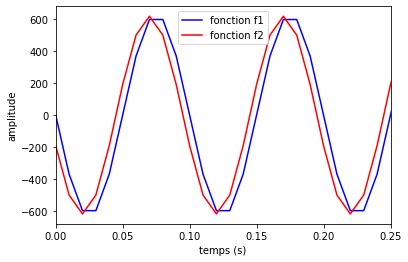

In [4]:
f2=np.zeros(len(f))

for i in np.arange(0,len(t)-1):
        f2[i]=((f[i+1]-f[i])/dt)
        
plt.figure(1)
plt.xlim(0,0.25)
plt.plot(t,f1,label='fonction f1',color='b'), plt.xlabel('temps (s)'), plt.ylabel('amplitude')
plt.plot(t,f2,label='fonction f2',color='r'), plt.xlabel('temps (s)'), plt.ylabel('amplitude')
plt.legend()

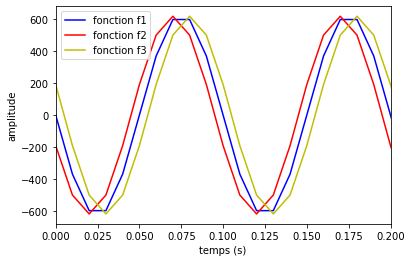

In [5]:
f3=np.zeros(len(f))

for i in np.arange(0,len(t)):
        f3[i]=((f[i]-f[i-1])/dt)
        
plt.figure(1)
plt.xlim(0,0.20)
plt.plot(t,f1,label='fonction f1',color='b'), plt.xlabel('temps (s)'), plt.ylabel('amplitude')
plt.plot(t,f2,label='fonction f2',color='r'), plt.xlabel('temps (s)'), plt.ylabel('amplitude')
plt.plot(t,f3,label='fonction f3',color='y'), plt.xlabel('temps (s)'), plt.ylabel('amplitude')

plt.legend()

In [6]:
#On observe un léger décalage entre les diférentes manières de calculer une dérivée

In [7]:
#En changeant le dt, on observe une accentuation de ces décalages

#centered scheme to compute f'(t)

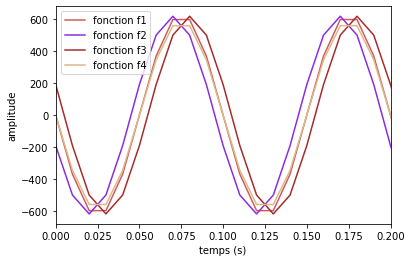

In [8]:
f4=np.zeros(len(f))

for i in np.arange(0,len(t)-1):
        f4[i]=((f[i+1]-f[i-1])/(2*dt))
        
plt.figure(1)
plt.xlim(0,0.20)
plt.plot(t,f1,label='fonction f1',color='indianred'), plt.xlabel('temps (s)'), plt.ylabel('amplitude')
plt.plot(t,f2,label='fonction f2',color='blueviolet'), plt.xlabel('temps (s)'), plt.ylabel('amplitude')
plt.plot(t,f3,label='fonction f3',color='brown'), plt.xlabel('temps (s)'), plt.ylabel('amplitude')
plt.plot(t,f4,label='fonction f4',color='burlywood'), plt.xlabel('temps (s)'), plt.ylabel('amplitude')

plt.legend()

In [9]:
#f41=np.zeros(len(f4))

#for i in np.arange(0,len(t)-1):
        #f41[i]=((f4[i+1]-f4[i-1])/(2*dt))
        
#plt.figure(1)
#plt.xlim(0,0.20)

#plt.plot(t,f4,label='fonction f4',color='burlywood'), plt.xlabel('temps (s)'), plt.ylabel('amplitude')
#plt.plot(t,f41,label='fonction f41',color='olivedrab'), plt.xlabel('temps (s)'), plt.ylabel('amplitude')

#plt.legend()

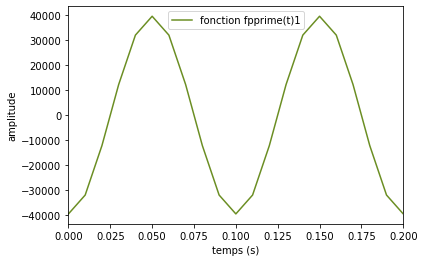

In [10]:
f2_calc=(-(w)**2)*A*np.cos(w*t)

plt.figure(1)
plt.xlim(0,0.20)

#plt.plot(t,f,label='fonction f(t)',color='burlywood'), plt.xlabel('temps (s)'), plt.ylabel('amplitude')
plt.plot(t,f2_calc,label='fonction fpprime(t)1',color='olivedrab'), plt.xlabel('temps (s)'), plt.ylabel('amplitude')

plt.legend()

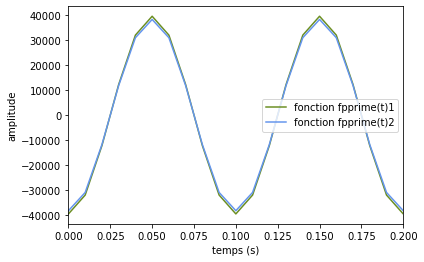

In [11]:
f2_num=np.zeros(len(f4))

for i in np.arange(0,len(t)-1):
        f2_num[i]=((f[i+1])-(2*f[i])+(f[i-1]))/((dt)**2)
        
plt.figure(1)
plt.xlim(0,0.20)

#plt.plot(t,f,label='fonction f(t)',color='burlywood'), plt.xlabel('temps (s)'), plt.ylabel('amplitude')
plt.plot(t,f2_calc,label='fonction fpprime(t)1',color='olivedrab'), plt.xlabel('temps (s)'), plt.ylabel('amplitude')
plt.plot(t,f2_num,label='fonction fpprime(t)2',color='cornflowerblue'), plt.xlabel('temps (s)'), plt.ylabel('amplitude')

plt.legend()

## Newtonian Cooling

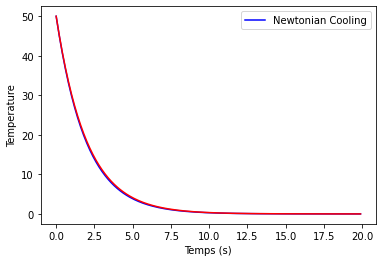

In [12]:
A=50
Tau=2
dt=0.1
dur=np.arange(0,20,dt)

T=np.zeros(len(dur))
T[0]=A
for i in np.arange(0,len(dur)-1):
        T[i+1]=(T[i])-(dt*((T[i])/Tau))

# Analytic solution 

Ta=A*np.exp(-dur/Tau)
        
plt.plot(dur,T,label='Newtonian Cooling',color='blue'), plt.xlabel('Temps (s)'), plt.ylabel('Temperature')
plt.plot(dur,Ta, color='r')
plt.legend()

# Studying convergence : error

(None, None)

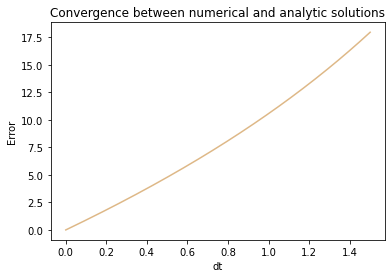

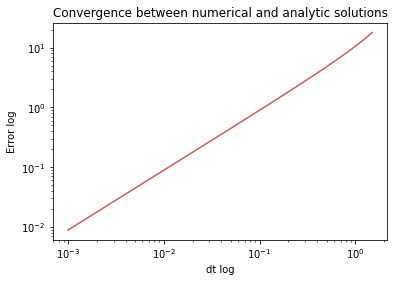

In [13]:
dt1=np.linspace(1e-3,1.5,200)
E=np.zeros(len(dt1))
A=50
Tau=2

for i in np.arange(0,len(dt1)):
    dur=np.arange(0,20,dt1[i])
    Tnum=np.zeros(len(dur))
    Tnum[0]=A
    for j in np.arange(0,len(dur)-1):
        Tnum[j+1]=(Tnum[j])-(dt1[i]*(Tnum[j]/Tau))
    Tana=A*np.exp(-dur/Tau)
    E[i]=np.sqrt((np.sum((Tana-Tnum)**2))*dt1[i])


plt.figure(1)
plt.plot(dt1,E, color='burlywood')
plt.title('Convergence between numerical and analytic solutions')
plt.xlabel('dt'),plt.ylabel(('Error'))
plt.figure(2)
plt.plot(dt1,E, color='indianred')
plt.title('Convergence between numerical and analytic solutions')
plt.xlabel('dt log'),plt.ylabel(('Error log'))
plt.xscale('log'),plt.yscale('log')

# Lorenz Model : attractor

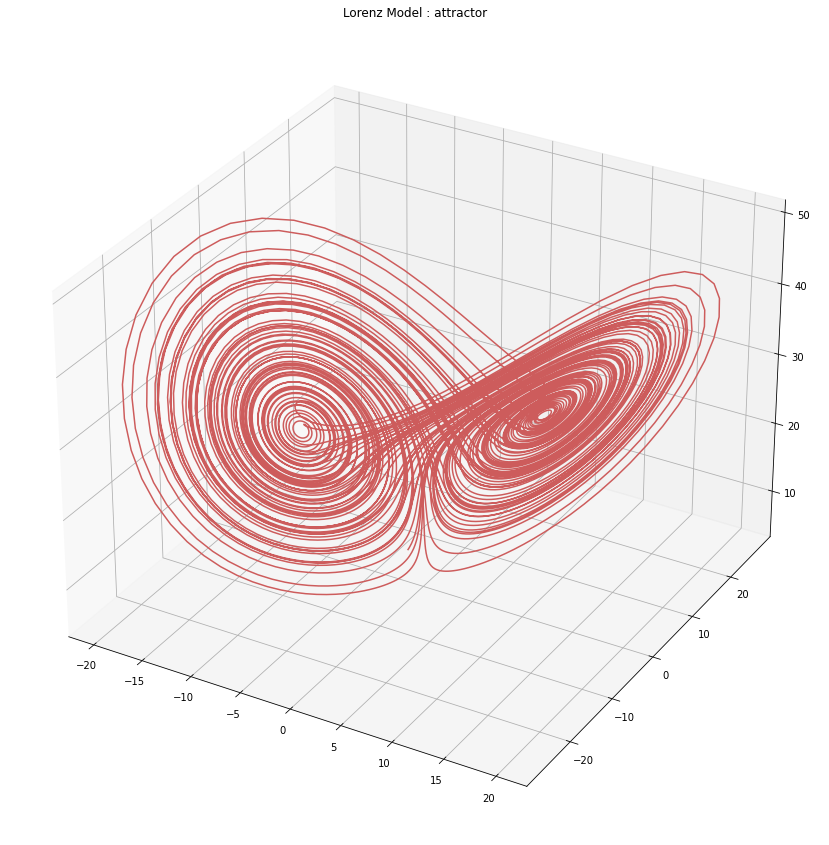

In [14]:
# define the parameters

rho=28
sigma=10
beta=8/3
dt=0.01

time=np.arange(0,100,dt)
x=np.zeros(len(time))
y=np.zeros(len(time))
z=np.zeros(len(time))

x[0]=8
y[0]=8
z[0]=rho-1


for i in np.arange(0,len(time)-1):
    x[i+1]=(sigma*(y[i]-x[i]))*dt+x[i]
    y[i+1]=(rho*x[i]-y[i]-x[i]*z[i])*dt+y[i]
    z[i+1]=(x[i]*y[i]-beta*z[i])*dt+z[i]

plt.figure(figsize=(15,15))
ax=plt.axes(projection='3d')
ax.plot3D(x,y,z,'indianred')
plt.title ('Lorenz Model : attractor')
plt.show()

# Heat Equation
### Explicit scheme

NameError: name 'go' is not defined

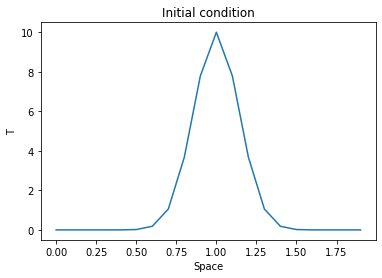

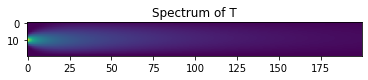

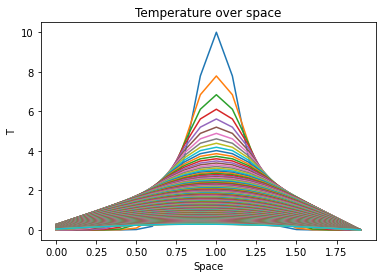

<Figure size 432x288 with 0 Axes>

In [15]:
# Initialization of the parameters

L=2 # m
x0=1
sigma=0.2
T0=10
D=0.1
duration=10 # sec
dt=0.05 # sec
dx=0.1 # m

time=np.arange(0,duration,dt)
space=np.arange(0,L,dx)

T=np.zeros((len(space),len(time)))

# spatial boundaries conditions
T[0][:]=0 # f1(t)
T[-1][:]=0 # f1(t)
T[L][:]=0 # f2(t)

# initial condition
T[:,0]=T0*np.exp(-(space-x0)**2/(sigma)**2) # f3(t)

plt.figure(1)
plt.plot(space,T[:,0])
plt.title('Initial condition')
plt.xlabel('Space') , plt.ylabel('T')

for j in np.arange(0,len(time)-1) :
    for i in np.arange(0,len(space)-1) :
        T[i][j+1]=T[i][j]+(D*dt/dx**2)*(T[i+1][j]+T[i-1][j]-2*T[i][j])
        

plt.figure(2)
plt.imshow(T)
plt.title('Spectrum of T')

plt.figure(3)
plt.plot(space,T)
plt.title('Temperature over space')
plt.xlabel('Space') , plt.ylabel('T')

### Implicit scheme

(Text(0.5, 0, 'Space'), Text(0, 0.5, 'T'))

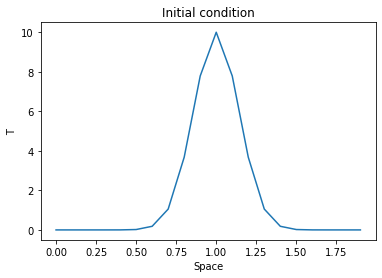

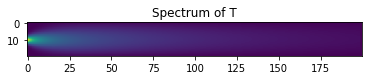

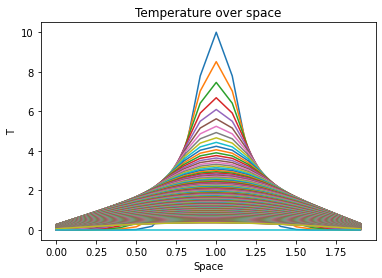

In [83]:
# Initialization of the parameters

L=2 # m
x0=1
sigma=0.2
T0=10
D=0.1
duration=10 # sec
dt=0.05 # sec
dx=0.1 # m
c1 = 0
c2 = 0

time=np.arange(0,duration,dt)
space=np.arange(0,L,dx)

T=np.zeros((len(space),len(time)))

# spatial boundaries conditions
T[0][:]=0 # f1(t)
T[-1][:]=0 # f1(t)
T[L][:]=0 # f2(t)

# initial condition
T[:,0]=T0*np.exp(-(space-x0)**2/(sigma)**2) # f3(t)

plt.figure(1)
plt.plot(space,T[:,0])
plt.title('Initial condition')
plt.xlabel('Space') , plt.ylabel('T')

# Matrix A with AT = dtD/dx[T(x+dx,t) - 2T(x,t) + T(x-dx,t)]
nx = int(L/dx)
alpha = D*dt/dx**2
A = np.eye(nx+2) * (1 + 2 * alpha)
b = -np.eye(nx) * alpha
A[1:-1,0:-2] += b
A[1:-1,2:] += b
A[0,0] = 1
A[-1,-1] = 1

A_inv = np.linalg.inv(A)

for j in np.arange(0,len(time)-2):
    v = np.concatenate(([c1],T[:,j],[c2]),axis=None)
    T[:,j+1]= (A_inv @ v)[1:-1]

plt.figure(2)
plt.imshow(T)
plt.title('Spectrum of T')

plt.figure(3)
plt.plot(space,T)
plt.title('Temperature over space')
plt.xlabel('Space') , plt.ylabel('T')

## Explicit scheme, 4th order
Matrix A with coefficients $(-\frac{1}{12}, \frac{4}{3},-\frac{5}{2},.,.)$

(Text(0.5, 0, 'Space'), Text(0, 0.5, 'T'))

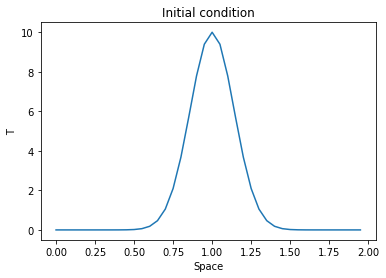

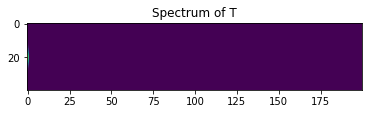

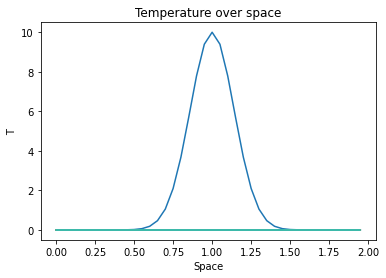

In [98]:
# Initialization of the parameters

L=2 # m
x0=1
sigma=0.2
T0=10
D=0.1
duration=10 # sec
dt=0.05 # sec
dx=0.05 # m
c1 = 0 # left boundary
c2 = 0 # right boundary

time=np.arange(0,duration,dt)
space=np.arange(0,L,dx)

T=np.zeros((len(space),len(time)))

# spatial boundaries conditions
T[0][:]=0 # f1(t)
T[-1][:]=0 # f1(t)
T[L][:]=0 # f2(t)

# initial condition
T[:,0]=T0*np.exp(-(space-x0)**2/(sigma)**2) # f3(t)

plt.figure(1)
plt.plot(space,T[:,0])
plt.title('Initial condition')
plt.xlabel('Space') , plt.ylabel('T')

# set up A mtx, use periodic b.c.
nx = int(L/dx)
alpha = D*dt/dx**2
from scipy.sparse import diags
k = [-1/12*alpha*np.ones(nx-2+4),4/3*alpha*np.ones(nx-1+4),1 -5/2*alpha*np.ones(nx+4), 4/3*alpha*np.ones(nx+1+4),-1/12*alpha*np.ones(nx+2+4)]
offset = [-2,-1,0,1,2]
A = diags(k,offset).toarray()
# DOES NOT WORK -> USE PERIODIC BOUD COND.
A[0,0] = 1
A[1,1] = 1
A[0,1:3] = 0
A[1,2] = 0
A[2,1] = 0
A[1:3,0] = 0
A[-1,-1] = 1
A[-2,-2] = 1
A[-1,-3:-1] = 0
A[-2,-3] = 0
A[-3,-2] = 0
A[-3:-1,-1] = 0

for i in np.arange(0,len(space)-1) :
    v = np.concatenate((c1*np.ones(2),T[:,j],c2*np.ones(2)),axis=None)
    T[:,j+1]= (A @ v)[2:-2]


plt.figure(2)
plt.imshow(T)
plt.title('Spectrum of T')

plt.figure(3)
plt.plot(space,T)
plt.title('Temperature over space')
plt.xlabel('Space') , plt.ylabel('T')